<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks_solutions/AIDL_A02_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
words = 10000 #use the 10,000 most common words
max_len = 200 #use the first 200 words of a review
embedding_size = 64 #64-dimensional array
index_from=3   # word index offset, <PAD>:0, <START>:1, <UNK>:2.

# Load IMDB Data

In [3]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=words, index_from=index_from)
print(x_train.shape)
print(x_val.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000,)
(25000,)


In [4]:
word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {word:(index+index_from) for word,index in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(x_train[0])
print(' '.join(id_to_word[id] for id in x_train[0] ))

1654784/1641221 [==============================] - 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 3

In [5]:
#compute the number of the words per sentence
for i in range(10):
  print("The number of words in review {} is equal to: {}".format(i,len(x_train[i])))

The number of words in review 0 is equal to: 218
The number of words in review 1 is equal to: 189
The number of words in review 2 is equal to: 141
The number of words in review 3 is equal to: 550
The number of words in review 4 is equal to: 147
The number of words in review 5 is equal to: 43
The number of words in review 6 is equal to: 123
The number of words in review 7 is equal to: 562
The number of words in review 8 is equal to: 233
The number of words in review 9 is equal to: 130


In [6]:
# use keras.preprocessing to make all the senteces have equal number of words
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len, padding='post')
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=max_len, padding='post')

In [7]:
#should produce same values
for i in range(10):
  print("The number of words in review {} is equal to: {}".format(i,len(x_train[i])))

The number of words in review 0 is equal to: 200
The number of words in review 1 is equal to: 200
The number of words in review 2 is equal to: 200
The number of words in review 3 is equal to: 200
The number of words in review 4 is equal to: 200
The number of words in review 5 is equal to: 200
The number of words in review 6 is equal to: 200
The number of words in review 7 is equal to: 200
The number of words in review 8 is equal to: 200
The number of words in review 9 is equal to: 200


# LSTM

In [10]:
seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(words, embedding_size)(inputs)  #define embedding layer with shape (10,000x64)

# add 2 LSTM layers with 64 neurons as hidden layer
x = layers.LSTM(64, return_sequences=True)(x) #layers.Bidirectional()
x = layers.Dropout(0.2)(x)
x = layers.LSTM(64)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          33024     
                                                                 
 dropout_2 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65  

In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
782/782 [==============================] - 21s 23ms/step - loss: 0.6889 - accuracy: 0.5304 - val_loss: 0.6878 - val_accuracy: 0.5424
Epoch 2/10
782/782 [==============================] - 17s 22ms/step - loss: 0.6481 - accuracy: 0.6033 - val_loss: 0.5719 - val_accuracy: 0.7215
Epoch 3/10
782/782 [==============================] - 17s 22ms/step - loss: 0.4771 - accuracy: 0.7918 - val_loss: 0.4174 - val_accuracy: 0.8210
Epoch 4/10
782/782 [==============================] - 17s 22ms/step - loss: 0.4084 - accuracy: 0.8284 - val_loss: 0.3745 - val_accuracy: 0.8380
Epoch 5/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3226 - accuracy: 0.8708 - val_loss: 0.3390 - val_accuracy: 0.8607
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2521 - accuracy: 0.9036 - val_loss: 0.3856 - val_accuracy: 0.8421
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2144 - accuracy: 0.9204 - val_loss: 0.3339 - val_accuracy:

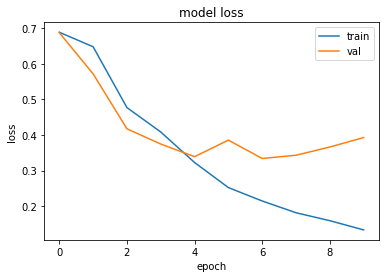

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

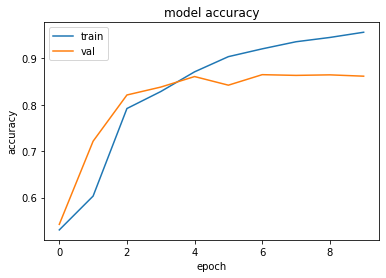

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
# Hint: lower case, split, tokenize (text to vec, use unk), add sos, pad
post_1 = "I really enjoyed Star Wars V!!! Amazing movie. ZUPER"
post_2 = "Star Wars episode IX has a poor scenario :("

In [15]:
import re
def normalizeString(s):
    s = s.lower().strip()
    s = re.sub(r"[^a-zA-Z]+", r" ", s)
    return s.split()

In [16]:
post_1 = normalizeString(post_1)
post_2 = normalizeString(post_2)

In [17]:
post_1.insert(0, '<START>')
post_2.insert(0, '<START>')

In [18]:
post_1_tokens = [word_to_id[id] if id in word_to_id else word_to_id['<UNK>'] for id in post_1]
post_2_tokens = [word_to_id[id] if id in word_to_id else word_to_id['<UNK>'] for id in post_2]

In [19]:
posts  = []
posts.append(np.asarray(post_1_tokens))
posts.append(np.asarray(post_2_tokens))

In [20]:
posts_padded = keras.preprocessing.sequence.pad_sequences(np.asarray(posts), maxlen=max_len, padding='post')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [21]:
posts_padded = np.asarray(posts_padded)
posts_padded[posts_padded>=10000] = word_to_id['<UNK>']

In [22]:
preds = model.predict(np.asarray(posts_padded))

In [23]:
preds

array([[0.95932627],
       [0.24746388]], dtype=float32)